In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## R(2,2) Plot

In [2]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

In [3]:
edges = [(0,1),(1,2),(0,2)]
edge_lists = [[],[edges[0]], [edges[1]], [edges[2]], [edges[0], edges[1]],[edges[0], edges[2]],\
              [edges[1],edges[2]],[edges[0], edges[1], edges[2]]]

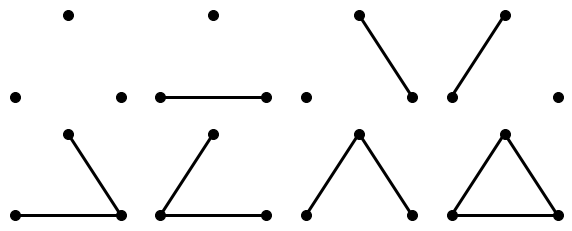

In [197]:
plt.figure(figsize=(10,4))
for i in range(len(edge_lists)):
    plt.subplot(2,4,i+1)
    G = nx.Graph()
    G.add_nodes_from([0,1,2])
    G.add_edges_from(edge_lists[i])
    nx.draw_planar(G, **options)
#plt.savefig('3-graphs.png', dpi=100, transparent=False)

## Cutting Circles

In [ ]:
import matplotlib.cm as cm

In [182]:
# Sample radii from a dirichlet distribution
# Keep resampling until all radii are below 0.5...
# Probably not the smartest way to do this
def plot_circles(n):
    # Sample radii
    alphas = np.ones(n)
    radii = np.random.dirichlet(alphas) * 5 / np.pi
    while np.any(radii > 0.5):
        radii = np.random.dirichlet(alphas) * 5 / np.pi
    # Plot Circles
    centers = []
    for i in range(n):
        center = np.random.uniform(radii[i], 1-radii[i], 2)
        centers.append(center)
        color = np.random.random(3)
        circle = plt.Circle(center, radii[i], facecolor=color, alpha=0.15, edgecolor='black')
        ax = plt.gca()
        ax.add_artist(circle)
    # Find a cut (by random sampling)
    centers = np.array(centers)
    ab, c = np.random.random(2) - 0.5, np.random.random()
    while( np.sum( np.abs(np.dot(centers, ab) + c) <= radii * np.linalg.norm(ab)) < 4):
        #print(np.abs(np.dot(centers, ab) + c), radii * np.linalg.norm(ab))
        ab, c = np.random.random(2) - 0.5, np.random.random()
    # Plot the cut
    x = np.linspace(0,1)
    y = -ab[0] / ab[1] * x - c / ab[1]
    plt.plot(x,y,'--', color='tab:red')
    # Other bookkeeping
    ax.grid()
    plt.xlim([0,1])
    plt.ylim([0,1])
    ax.set_aspect(1.0)
    plt.xticks([])
    plt.yticks([])
    ax.set_title('{} Circles'.format(n))

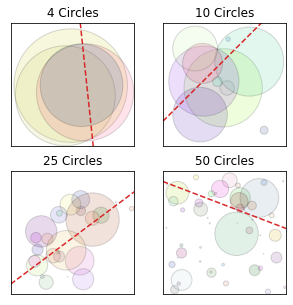

In [201]:
plt.figure(figsize=(5,5))
num_circles = [4,10,25,50]
for i in range(4):
    plt.subplot(2,2,i+1)
    plot_circles(num_circles[i])
#plt.savefig('cut-circles.png', dpi=100, transparent=False)